In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [195]:
data = pd.read_csv("data.csv")
data


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


In [196]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [198]:
# Currency to numbers
cols_to_convert = ["Price per Unit", "Units Sold", "Total Sales", "Operating Profit", "Operating Margin"]

for col in cols_to_convert:
  
    data[col] = data[col].astype(str).replace(r"[\$,]", "", regex=True).str.strip()

data["Operating Margin"] = data["Operating Margin"].str.replace("%", "").astype(float) / 100

data[cols_to_convert[:-1]] = data[cols_to_convert[:-1]].astype(float)

print(data.dtypes)

Retailer             object
Retailer ID           int64
Invoice Date         object
Region               object
State                object
City                 object
Product              object
Price per Unit      float64
Units Sold          float64
Total Sales         float64
Operating Profit    float64
Operating Margin    float64
Sales Method         object
dtype: object


In [199]:
data.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [200]:
data.describe()


,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.282131,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.124141,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1922.000000,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.500000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52063.000000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


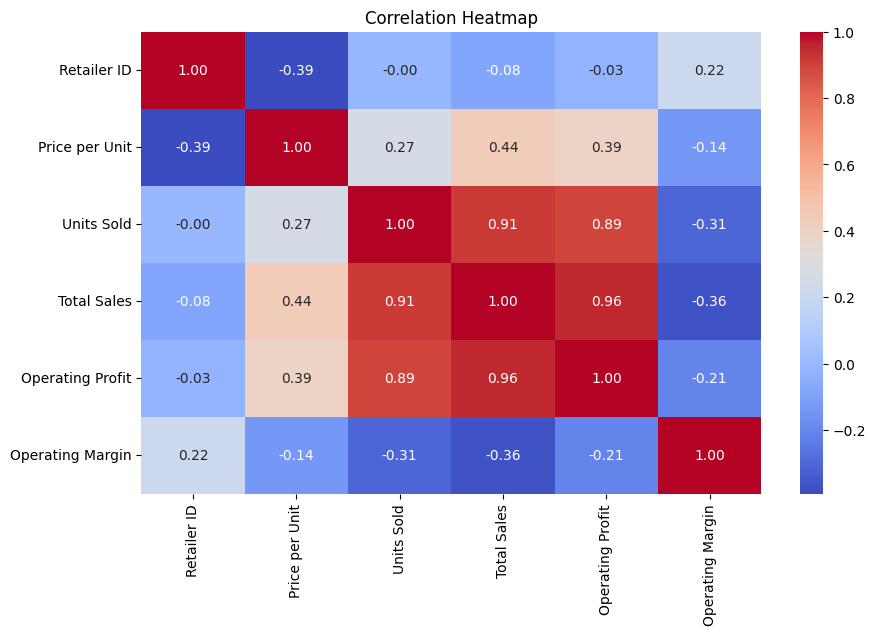

In [201]:
plt.figure(figsize=(10, 6))


numeric_data = data.select_dtypes(include=["number"])

sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [202]:
data = data.drop(columns=["Retailer ID"], errors="ignore")  # Drop safely

# Create a new feature: Total Revenue
data["Total Revenue"] = data["Price per Unit"] * data["Units Sold"]

In [203]:
data.head()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Total Revenue
0,Foot Locker,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,60000.0
1,Foot Locker,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,50000.0
2,Foot Locker,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,40000.0
3,Foot Locker,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,38250.0
4,Foot Locker,1/5/2020,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,54000.0


In [204]:
data['Region'].unique()


array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [205]:
cat_cols = ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']

# Apply One-Hot Encoding
data = pd.get_dummies(data, columns=cat_cols, drop_first=True) 

In [206]:
data.head()

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Total Revenue,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,...,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear,Sales Method_Online,Sales Method_Outlet
0,1/1/2020,50.0,1200.0,600000.0,300000.0,0.50,60000.0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1/2/2020,50.0,1000.0,500000.0,150000.0,0.30,50000.0,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1/3/2020,40.0,1000.0,400000.0,140000.0,0.35,40000.0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1/4/2020,45.0,850.0,382500.0,133875.0,0.35,38250.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,1/5/2020,60.0,900.0,540000.0,162000.0,0.30,54000.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [207]:
data.shape

(9648, 123)

In [208]:


num_cols = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Margin', 'Total Revenue']


scaler = MinMaxScaler()

# Features scaling
data[num_cols] = scaler.fit_transform(data[num_cols])

In [209]:
data.head()

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Total Revenue,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,...,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear,Sales Method_Online,Sales Method_Outlet
0,1/1/2020,0.417476,0.941176,0.727273,300000.0,0.571429,0.727273,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1/2/2020,0.417476,0.784314,0.606061,150000.0,0.285714,0.606061,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1/3/2020,0.320388,0.784314,0.484848,140000.0,0.357143,0.484848,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1/4/2020,0.368932,0.666667,0.463636,133875.0,0.357143,0.463636,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,1/5/2020,0.514563,0.705882,0.654545,162000.0,0.285714,0.654545,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [210]:
X = data.drop(columns=["Operating Profit"]) 
y = data["Operating Profit"]  

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [211]:
X_test.shape

(3860, 122)

In [212]:
X_train.shape

(5788, 122)

In [213]:
X_train['Invoice Date'] = pd.to_datetime(X_train['Invoice Date'])
X_test['Invoice Date'] = pd.to_datetime(X_test['Invoice Date'])

X_train['Year'] = X_train['Invoice Date'].dt.year
X_train['Month'] = X_train['Invoice Date'].dt.month
X_train['Day'] = X_train['Invoice Date'].dt.day

X_test['Year'] = X_test['Invoice Date'].dt.year
X_test['Month'] = X_test['Invoice Date'].dt.month
X_test['Day'] = X_test['Invoice Date'].dt.day
X_train = X_train.drop(columns=['Invoice Date'])
X_test = X_test.drop(columns=['Invoice Date'])

In [214]:
X_test.shape

(3860, 124)

In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Accuracy check
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MSE: {mse:.4f}, R²: {r2:.4f}")


Linear Regression - MSE: 3847950.1170, R²: 0.9987


In [216]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(20))

        Actual  Predicted
2997   70000.0   70148.79
7903    5410.0    5460.22
4012    4241.0    4197.24
2392  102375.0  101816.90
3284   48000.0   47995.00
7619    1949.0    1949.08
1263   48125.0   48466.35
795    15750.0   15713.63
8907    1767.0    1775.74
2513   36000.0   37046.39
2417   75000.0   74925.00
7213     277.0     278.95
9343    1394.0    1398.79
2769  162000.0  162230.00
119   140625.0  140848.27
8912    1529.0    1556.89
2115  118125.0  118317.59
4779    2531.0    2560.35
4415    2565.0    2574.09
623    91000.0   90982.52


In [217]:
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")


y_test shape: (3860,)
y_pred shape: (3860,)
